In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [12]:
df = pd.read_csv(r'business.retailsales2.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         36 non-null     object 
 1   Year          36 non-null     int64  
 2   Total Orders  36 non-null     int64  
 3   Gross Sales   36 non-null     float64
 4   Discounts     36 non-null     float64
 5   Returns       36 non-null     float64
 6   Net Sales     36 non-null     float64
 7   Shipping      36 non-null     float64
 8   Total Sales   36 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.7+ KB


In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

Month           0
Year            0
Total Orders    0
Gross Sales     0
Discounts       0
Returns         0
Net Sales       0
Shipping        0
Total Sales     0
dtype: int64

In [16]:
df['Month'] = df['Month'].fillna('Total Orders')
df['Year'] = df['Year'].fillna('Art & Sculpture')
df[df['Shipping'].isnull()==True]

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales


In [43]:
#Finding net quantity demand per Month
df.groupby('Month')['Total Orders'].sum()

Month
April        243
August       242
December     622
February     188
January      243
July         262
June         277
March        223
May          232
November     503
October      227
September    235
Name: Total Orders, dtype: int64

In [44]:
##here we can find mean quantity ordered by per customer for each year
df.groupby('Year')['Net Sales'].mean()

Year
2017     7626.708333
2018     8732.348333
2019    10816.366667
Name: Net Sales, dtype: float64

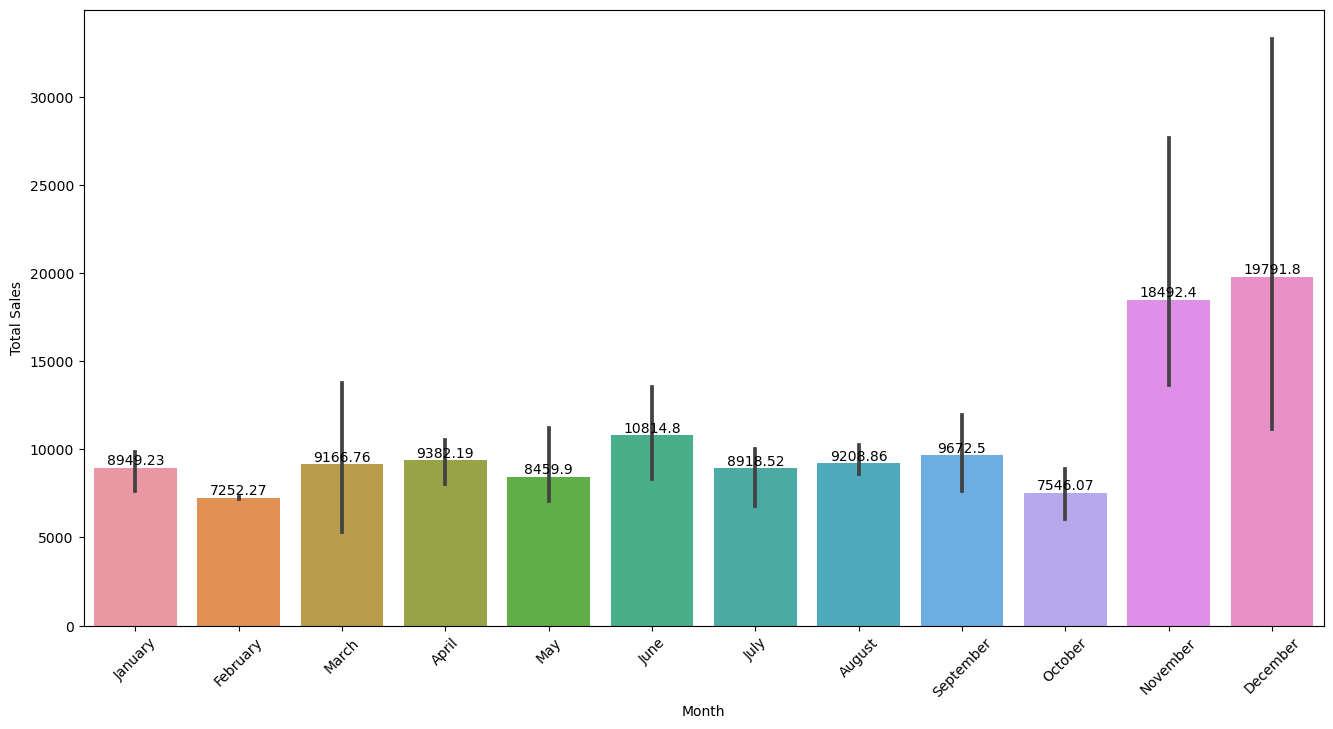

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))

ax = sns.barplot(data=df, x='Month', y='Total Sales', orient='v')

ax.bar_label(ax.containers[0])


plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Total Sales'>

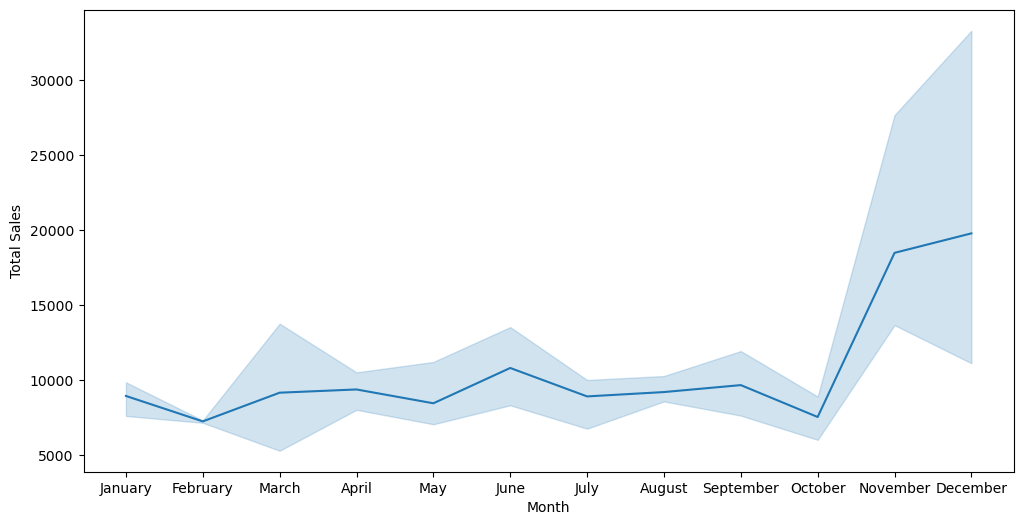

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Month", y="Total Sales")

<AxesSubplot:xlabel='Year', ylabel='Total Orders'>

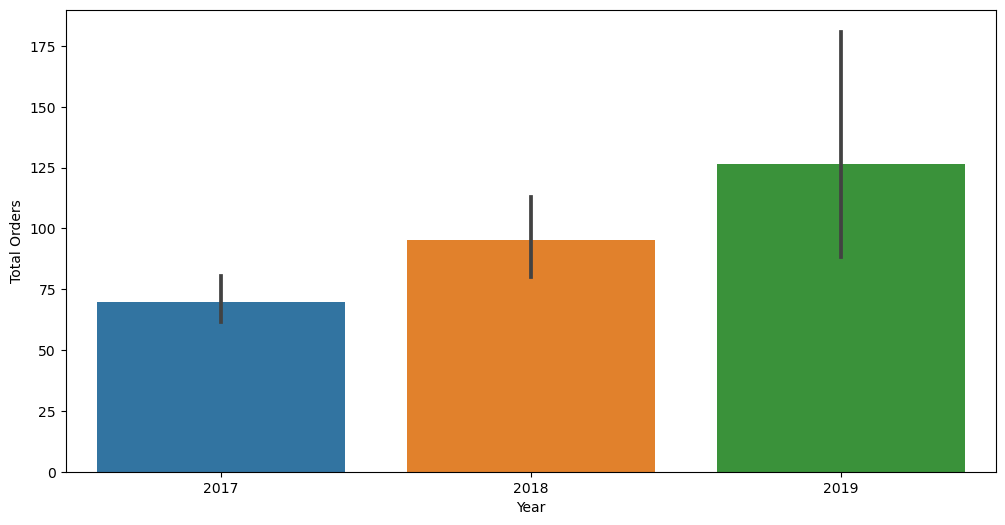

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Year", y="Total Orders")

<AxesSubplot:xlabel='Total Sales', ylabel='Count'>

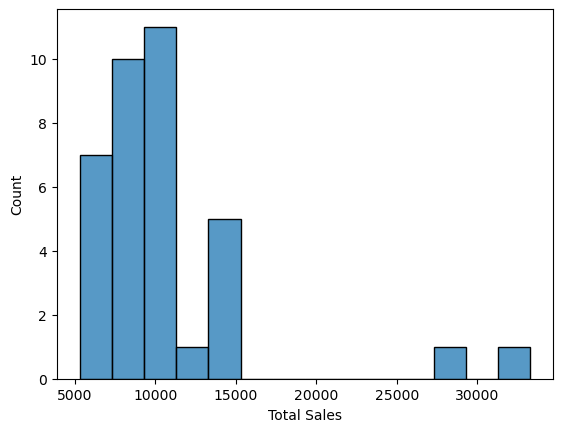

In [23]:
y=df['Total Sales']
sns.histplot(y)

Text(0.5, 1.0, 'composition of prices')

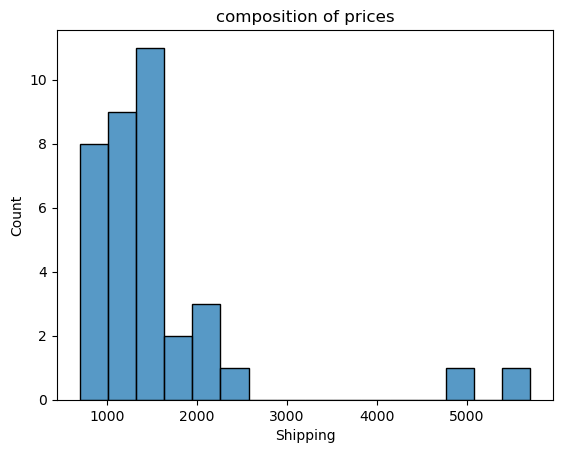

In [25]:
y=df['Shipping']
#plt.hist(y)
sns.histplot(y)
plt.title('composition of prices')

C:\Users\bhavya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'distribution of Month according to Net Sales')

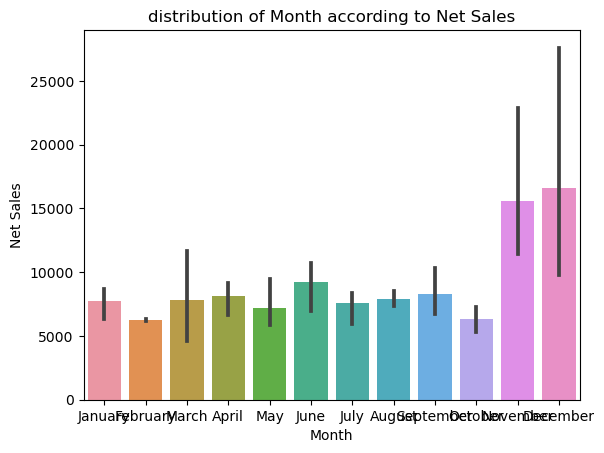

In [27]:
x=df['Month']
y=df['Net Sales']
sns.barplot(x,y)
plt.xlabel('Month')
plt.ylabel('Net Sales')
plt.title('distribution of Month according to Net Sales')

C:\Users\bhavya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Year based on Total Orders')

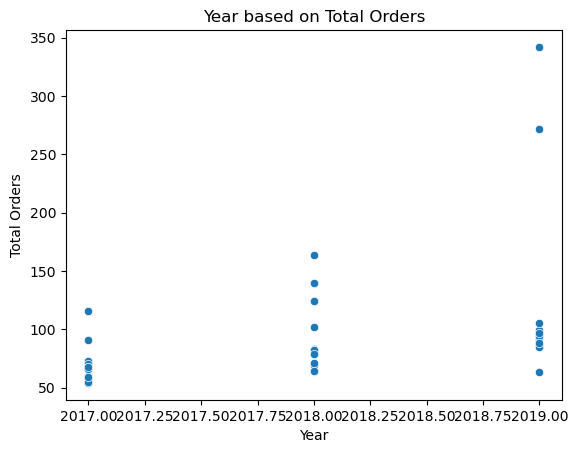

In [29]:
x=df['Year']
y=df['Total Orders']
#plt.scatter(x,y)
sns.scatterplot(x,y)
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.title('Year based on Total Orders')

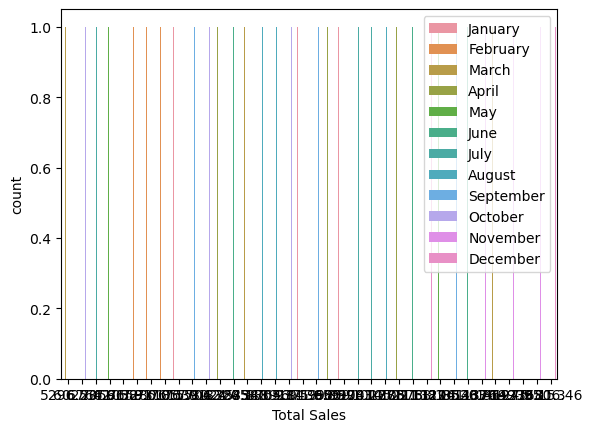

In [31]:
y=df['Month']
sns.countplot(data=df,x='Total Sales',hue='Month')
plt.legend(y)
#plt.title("Distribution of no.of 'Total Sales' and 'Month')

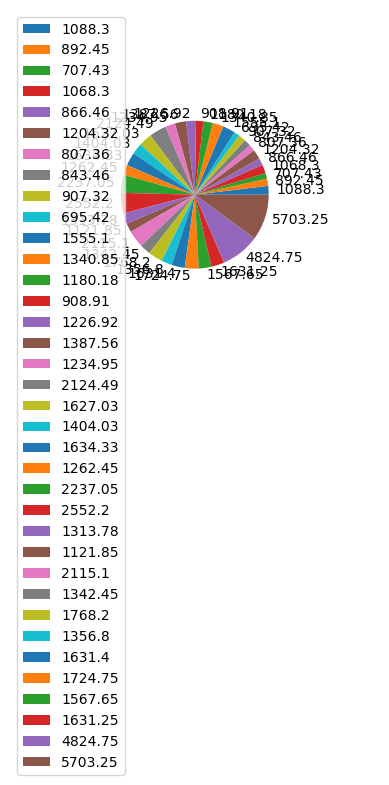

In [34]:
x=df['Shipping']
y=df['Shipping']
plt.pie(x,radius=0.5,labels=x)
plt.legend(y)

<AxesSubplot:ylabel='None'>

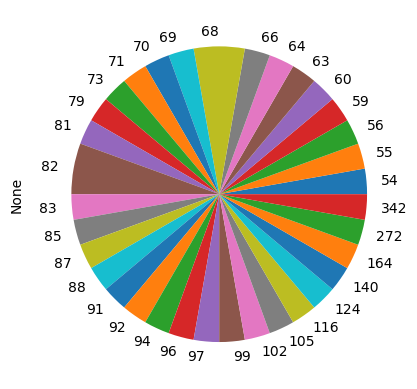

In [36]:
df.groupby('Total Orders').size().plot.pie()

<AxesSubplot:xlabel='Net Sales'>

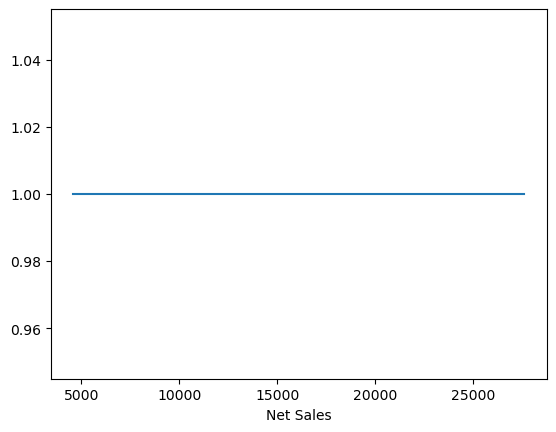

In [40]:
#split data by category 'Net Sales ' 
#calculate size of each group
#plot the data
df.groupby('Net Sales').size().plot()

<AxesSubplot:ylabel='Year'>

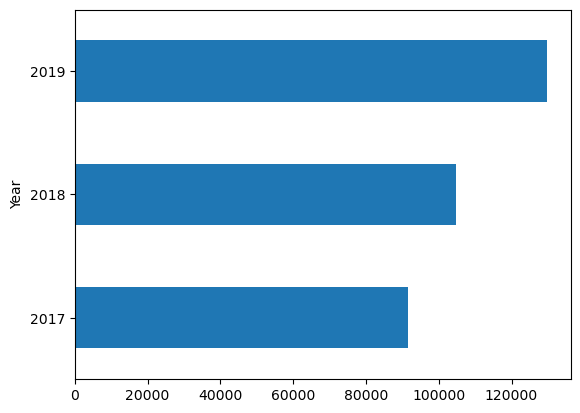

In [41]:
#calculate the sum of each group
#sort data in ascending order
#make a horizontal bargraph 
df.groupby('Year')['Net Sales']\
  .sum()\
  .sort_values()\
  .plot.barh()

73     1
97     1
88     1
105    1
94     1
85     1
96     1
92     1
99     1
63     1
87     1
164    1
140    1
71     1
79     1
102    1
124    1
55     1
56     1
60     1
70     1
54     1
66     1
272    1
342    1
91     1
116    1
83     1
69     1
64     1
81     1
59     1
68     2
82     2
Name: Total Orders, dtype: int64


C:\Users\bhavya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Orders', ylabel='count'>

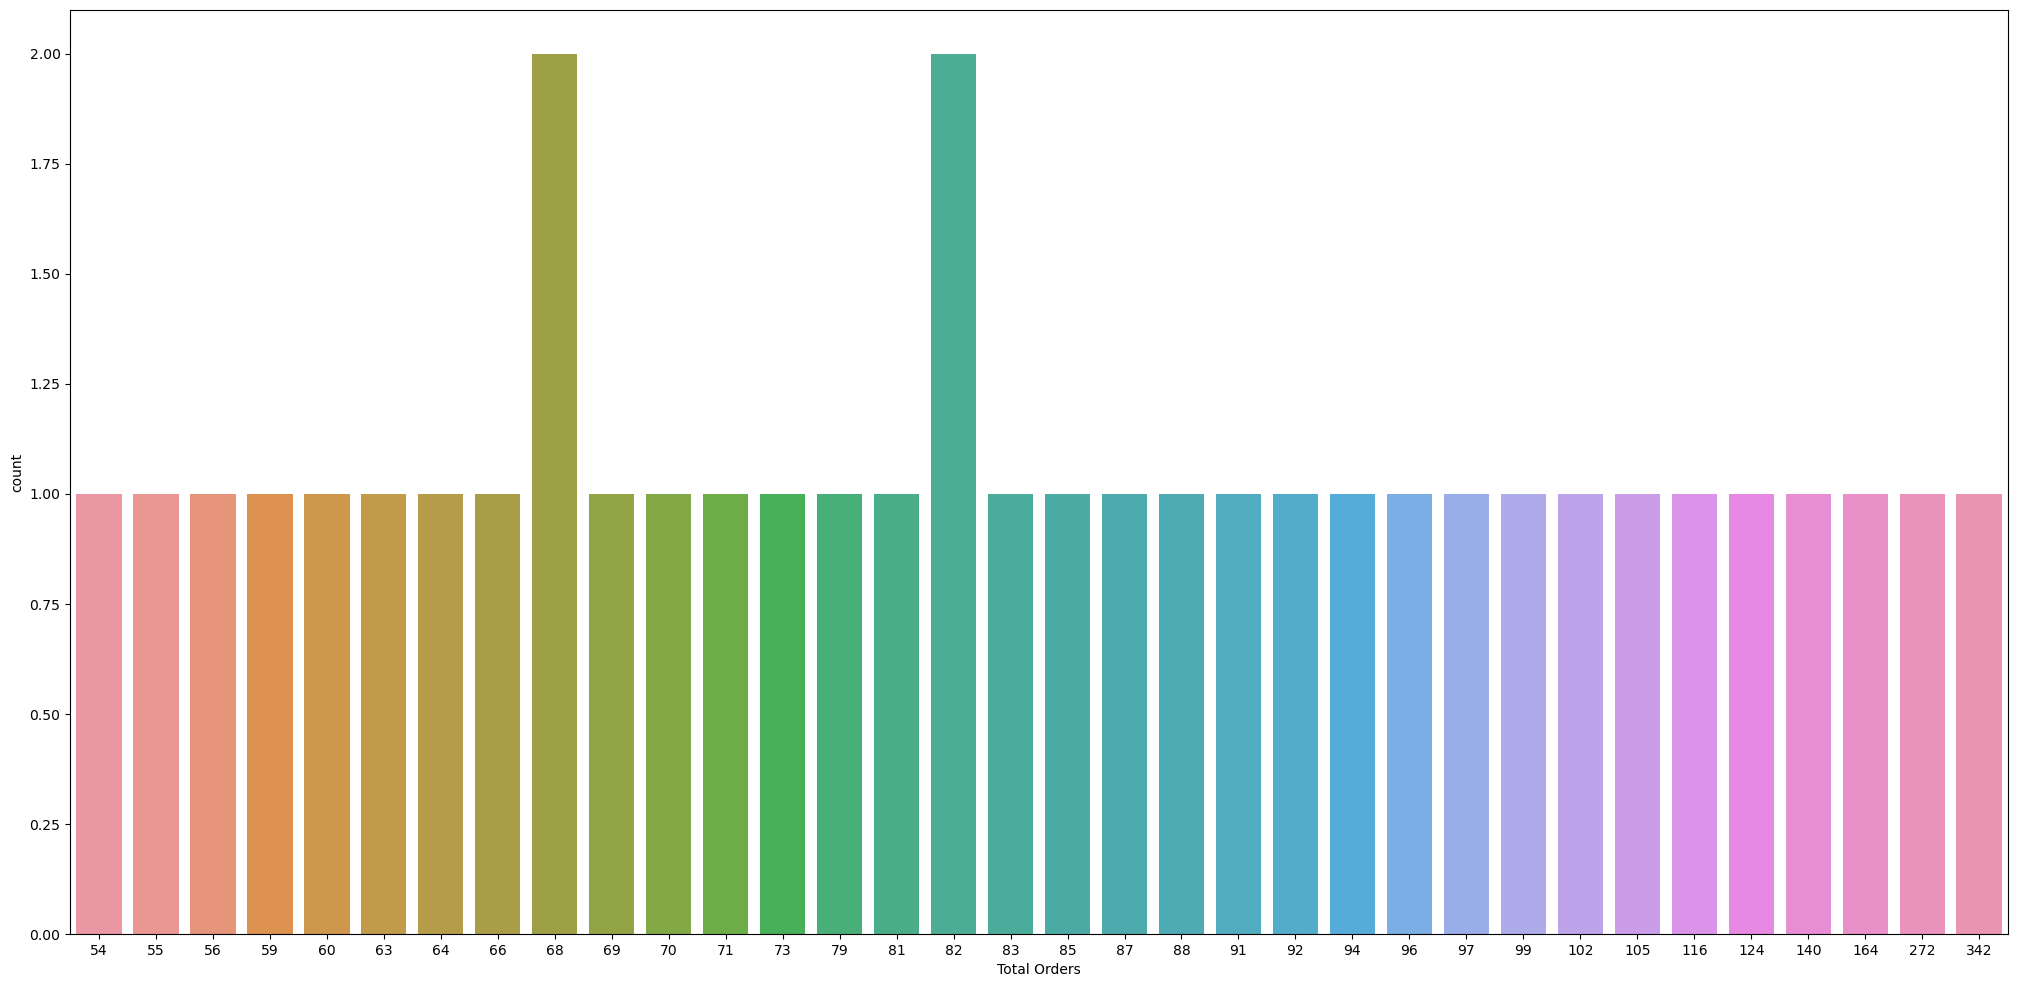

In [45]:
print(df['Total Orders'].value_counts(ascending=True))
plt.figure(figsize=(25,12))
sns.countplot(df['Total Orders'])